# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
# when running in Udacity workspace
# !pip -q install ./python

In [1]:
from maddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch
from unityagents import UnityEnvironment

%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
## when running locally
env = UnityEnvironment(file_name='Tennis.app')


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("Using brain {}".format(brain_name))

Using brain TennisBrain


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


In [5]:
state_vector_names = ['racket x pos     ', 'racket y pos     ', 'racket x velocity', 'racket y velocity',
                      'ball   x pos     ', 'ball   y pos     ', 'ball   x velocity', 'ball   y velocity']

print('The reshaped state vector for the first agent looks like:')
state_stack0 = states[0].reshape(3, 8)
_ = [print(state_vector_names[index], 
           state_stack0[0][index], 
           state_stack0[1][index], 
           state_stack0[2][index]) for index in range(8)]

print('The reshaped state vector for the first agent looks like:')
state_stack1 = states[1].reshape(3, 8)
_ = [print(state_vector_names[index], 
           state_stack1[0][index], 
           state_stack1[1][index], 
           state_stack1[2][index]) for index in range(8)]


The reshaped state vector for the first agent looks like:
racket x pos      0.0 0.0 -6.6527862548828125
racket y pos      0.0 0.0 -1.5
racket x velocity 0.0 0.0 -0.0
racket y velocity 0.0 0.0 0.0
ball   x pos      0.0 0.0 6.83172082901001
ball   y pos      0.0 0.0 6.0
ball   x velocity 0.0 0.0 -0.0
ball   y velocity 0.0 0.0 0.0
The reshaped state vector for the first agent looks like:
racket x pos      0.0 0.0 -6.466985702514648
racket y pos      0.0 0.0 -1.5
racket x velocity 0.0 0.0 0.0
racket y velocity 0.0 0.0 0.0
ball   x pos      0.0 0.0 -6.83172082901001
ball   y pos      0.0 0.0 6.0
ball   x velocity 0.0 0.0 0.0
ball   y velocity 0.0 0.0 0.0


In [6]:
actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
actions = np.clip(actions, -1, 1) # all actions between -1 and 1
print(actions)
env_info = env.step(actions)[brain_name]           # send all actions to tne environment
next_states1 = env_info.vector_observations         # get next state (for each agent)
#print(next_states1)
print('The reshaped state vector for the first agent looks like:')
state_stack0 = next_states1[0].reshape(3, 8)
_ = [print(state_vector_names[index], 
           state_stack0[0][index], 
           state_stack0[1][index], 
           state_stack0[2][index]) for index in range(8)]
print('The reshaped state vector for the second agent looks like:')
state_stack1 = next_states1[0].reshape(3, 8)
_ = [print(state_vector_names[index], 
           state_stack1[0][index], 
           state_stack1[1][index], 
           state_stack1[2][index]) for index in range(8)]

[[-1.         -0.38651097]
 [-1.          0.37234143]]
The reshaped state vector for the first agent looks like:
racket x pos      0.0 -6.6527862548828125 -9.652788162231445
racket y pos      0.0 -1.5 -1.5588600635528564
racket x velocity 0.0 -0.0 -30.0
racket y velocity 0.0 0.0 -0.9810000061988831
ball   x pos      0.0 6.83172082901001 6.83172082901001
ball   y pos      0.0 6.0 5.941140174865723
ball   x velocity 0.0 -0.0 -30.0
ball   y velocity 0.0 0.0 -0.9810000061988831
The reshaped state vector for the second agent looks like:
racket x pos      0.0 -6.6527862548828125 -9.652788162231445
racket y pos      0.0 -1.5 -1.5588600635528564
racket x velocity 0.0 -0.0 -30.0
racket y velocity 0.0 0.0 -0.9810000061988831
ball   x pos      0.0 6.83172082901001 6.83172082901001
ball   y pos      0.0 6.0 5.941140174865723
ball   x velocity 0.0 -0.0 -30.0
ball   y velocity 0.0 0.0 -0.9810000061988831


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
# MADDPG function

def maddpg(n_episodes=2000, max_t=1000, train_mode=True, goal_score = 0.5, consec_episodes = 100,print_every = 10,add_noise = True):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode
        goal_score (float)    : target score for a solution
        consec_episodes (int) : number of episodes for the running sum
        print_every (int)     : number of episodes for score printout
        add_noise (bool)      : if 'True' then add noise with the action

    """
    scores_window = deque(maxlen=consec_episodes)
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    already_solved = False    
    print('Episodes \tMax Reward\tMin Reward\tAvg Reward\tMoving Average in last 100 episodes')
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = get_actions(states, add_noise)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step

            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # save best score                        
        if ep_best_score > best_score:
            best_score = ep_best_score
            best_episode = i_episode
        
        # print results
        if i_episode % print_every == 0:
            print('{:0>4d}-{:0>4d}\t{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}'.format(
                i_episode-print_every+1, i_episode, np.max(scores_all[-print_every:]),np.min(scores_all[-print_every:]),np.mean(scores_all[-print_every:]), float(0) if i_episode<100 else moving_average[-1]))

        # determine if environment is solved and keep best performing models
        #total_average_score = np.mean(scores_window)
        if moving_average[-1] >= goal_score and i_episode >= 100:
            if not already_solved:
                print('<-- Environment solved in {:d} episodes! \
                \n<-- Moving Average: {:.3f} over past {:d} episodes'.format(
                    i_episode-consec_episodes, moving_average[-1], consec_episodes))
                already_solved = True
                # save weights
                torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
                torch.save(agent_0.critic_local.state_dict(), 'checkpoint_critic_0.pth')
                torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
                torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            elif ep_best_score >= best_score:
                print('<-- Best episode so far!\
                \nEpisode {:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode, ep_best_score, moving_average[-1]))
                # save weights
                torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0b.pth')
                torch.save(agent_0.critic_local.state_dict(), 'checkpoint_critic_0b.pth')
                torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1b.pth')
                torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1b.pth')
            elif (i_episode-best_episode) >= 200:
                # stop training if model stops converging
                print('<-- Training stopped. Best score not matched or exceeded for 200 episodes')
                break
            else:
                continue
            
    return scores_all, moving_average

In [9]:
def get_actions(states, add_noise):
    '''gets actions for each agent and then combines them into one array'''
    action_0 = agent_0.act(states, add_noise)    # agent 0 chooses an action
    action_1 = agent_1.act(states, add_noise)    # agent 1 chooses an action
    return np.concatenate((action_0, action_1), axis=0).flatten()

In [10]:
# initialize agents
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

### Best Model

In [11]:
# run the training loop

# BUFFER_SIZE = int(1e6)  # replay buffer size
# BATCH_SIZE = 128        # minibatch size
# LR_ACTOR = 1e-3         # learning rate of the actor
# LR_CRITIC = 1e-3        # learning rate of the critic
# WEIGHT_DECAY = 0        # L2 weight decay
# LEARN_EVERY = 1         # learning timestep interval
# LEARN_NUM = 1           # number of learning passes
# GAMMA = 0.99            # discount factor
# TAU = 7e-2              # for soft update of target parameters
# OU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter, volatility
# OU_THETA = 0.12         # Ornstein-Uhlenbeck noise parameter, speed of mean reversion
# EPS_START = 5.5         # initial value for epsilon in noise decay process in Agent.act()
# EPS_EP_END = 250        # episode to end the noise decay process
# EPS_FINAL = 0           # final value for epsilon after decay

scores, avgs = maddpg()

Episodes 	Max Reward	Min Reward	Avg Reward	Moving Average in last 100 episodes
0001-0010	0.000		0.000		0.000		0.000
0011-0020	0.100		0.000		0.020		0.000
0021-0030	0.100		0.000		0.010		0.000
0031-0040	0.000		0.000		0.000		0.000
0041-0050	0.000		0.000		0.000		0.000
0051-0060	0.000		0.000		0.000		0.000
0061-0070	0.000		0.000		0.000		0.000
0071-0080	0.000		0.000		0.000		0.000
0081-0090	0.000		0.000		0.000		0.000
0091-0100	0.000		0.000		0.000		0.003
0101-0110	0.000		0.000		0.000		0.003
0111-0120	0.000		0.000		0.000		0.001
0121-0130	0.000		0.000		0.000		0.000
0131-0140	0.000		0.000		0.000		0.000
0141-0150	0.100		0.000		0.030		0.003
0151-0160	0.100		0.000		0.040		0.007
0161-0170	0.100		0.000		0.010		0.008
0171-0180	0.000		0.000		0.000		0.008
0181-0190	0.100		0.000		0.010		0.009
0191-0200	0.100		0.000		0.020		0.011
0201-0210	0.100		0.000		0.010		0.012
0211-0220	0.100		0.000		0.010		0.013
0221-0230	0.100		0.000		0.010		0.014
0231-0240	0.100		0.000		0.010		0.015
0241-0250	0.100		0.000		0.010		0.

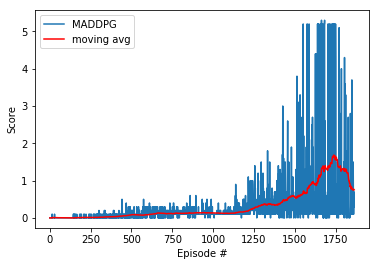

In [12]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

---
### 5. Test a saved agent

In [14]:
## reinitialize the agents (if needed)
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

# load the weights from file
agent_0_weights = 'checkpoint_actor_0b.pth'
agent_1_weights = 'checkpoint_actor_1b.pth'
agent_0.actor_local.load_state_dict(torch.load(agent_0_weights))
agent_1.actor_local.load_state_dict(torch.load(agent_1_weights))     

In [15]:
def test(n_episodes=10, max_t=1000, train_mode=False,consec_episodes = 10,print_every = 1,add_noise = False):

    scores_window = deque(maxlen=consec_episodes)
    scores_all = []
    moving_average = []  

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, add_noise)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # print results
        if i_episode % print_every == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode-print_every, i_episode, np.max(scores_all[-print_every:]), moving_average[-1]))
            
    return scores_all, moving_average            

In [ ]:
scores, avgs = test()

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()